# Evaluation

In [1]:
import ImageHandler as ih
from ImageHandler import cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:


loader = ih.ImageLoader('iliasdaten\Dosenoeffner')
loader.AddDirRealPath('iliasdaten\Flaschenoeffner')
loader.AddDirRealPath('iliasdaten\Korkenzieher')
loader.AddDirRealPath('train\Dosenoeffner')
loader.AddDirRealPath('train\Flaschenoeffner')
loader.AddDirRealPath('train\Korkenzieher')
loader.MakeSampleEntrys(100)



Added Directory iliasdaten\Dosenoeffner
Added Directory iliasdaten\Flaschenoeffner
Added Directory iliasdaten\Korkenzieher
Added Directory train\Dosenoeffner
Added Directory train\Flaschenoeffner
Added Directory train\Korkenzieher


In [3]:
changer = ih.ImageChanger(loader.sampleEntrysPath, 1, False)
changer.Blur(3)
changer.Gray()
changer.ThresholdDual(False,tresh=120)
changer.FrameByWidth(500)
changer.Contures(2)
changer.ShowRandomImage()
loader.AddColumnsToSample(changer.contureValues)
loader.DeleteColumnFromSample('name')
loader.DeleteColumnFromSample('path')
loader.DeleteColumnFromSample('directoryPath')
loader.DeleteColumnFromSample('assignment')
loader.PrintSamplesToCSV()

no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
no pop
-------------CSV Done------------


In [4]:
test_df = pd.read_csv('output.csv')

In [5]:
test_df.head()

,approxContureArea_1,approxContureLenght_1,area_1,boxLenght_1,boxWidth_1,convexHullArea_1,convexHullLenght_1,index,perimeter_1,ratio_1,stein_1,type
0,0.0,900.5087280273438,26730.0,450.20263671875,113.9911880493164,38012.0,1000.1109080314636,297,1317.9310202598572,3.949451220071303,13.892443989449804,Dosenoeffner
1,None,None,None,None,None,None,None,1290,None,None,None,Korkenzieher
2,None,None,None,None,None,None,None,751,None,None,None,Korkenzieher
3,None,None,None,None,None,None,None,205,None,None,None,Dosenoeffner
4,None,None,None,None,None,None,None,1338,None,None,None,Korkenzieher


In [6]:
test_df.head(20)

,approxContureArea_1,approxContureLenght_1,area_1,boxLenght_1,boxWidth_1,convexHullArea_1,convexHullLenght_1,index,perimeter_1,ratio_1,stein_1,type
0,0.0,900.5087280273438,26730.0,450.20263671875,113.9911880493164,38012.0,1000.1109080314636,297,1317.9310202598572,3.949451220071303,13.892443989449804,Dosenoeffner
1,None,None,None,None,None,None,None,1290,None,None,None,Korkenzieher
2,None,None,None,None,None,None,None,751,None,None,None,Korkenzieher
3,None,None,None,None,None,None,None,205,None,None,None,Dosenoeffner
4,None,None,None,None,None,None,None,1338,None,None,None,Korkenzieher
5,None,None,None,None,None,None,None,1321,None,None,None,Korkenzieher
6,None,None,None,None,None,None,None,1292,None,None,None,Korkenzieher
7,None,None,None,None,None,None,None,106,None,None,None,Dosenoeffner
8,None,None,None,None,None,None,None,789,None,None,None,Korkenzieher
9,None,None,None,None,None,None,None,1343,None,None,None,Korkenzieher


In [7]:
test_df.columns 

Index(['approxContureArea_1', 'approxContureLenght_1', 'area_1', 'boxLenght_1',
       'boxWidth_1', 'convexHullArea_1', 'convexHullLenght_1', 'index',
       'perimeter_1', 'ratio_1', 'stein_1', 'type'],
      dtype='object')

In [8]:
test_df.describe()

,index
count,100.00000
mean,760.68000
std,420.21668
min,6.00000
25%,359.50000
50%,788.00000
75%,1111.25000
max,1373.00000


In [9]:
test_df.shape #anzahl Datensätze udn Spalten

(100, 12)

Scatterplot von 2 Merkmalen um Klassifikation zu beurteilen

In [10]:
colors = {'Dosenoeffner':'r','Flaschenoeffner':'g','Korkenzieher':'b'} # Farben für Kategorien

KeyError: 'area_2'

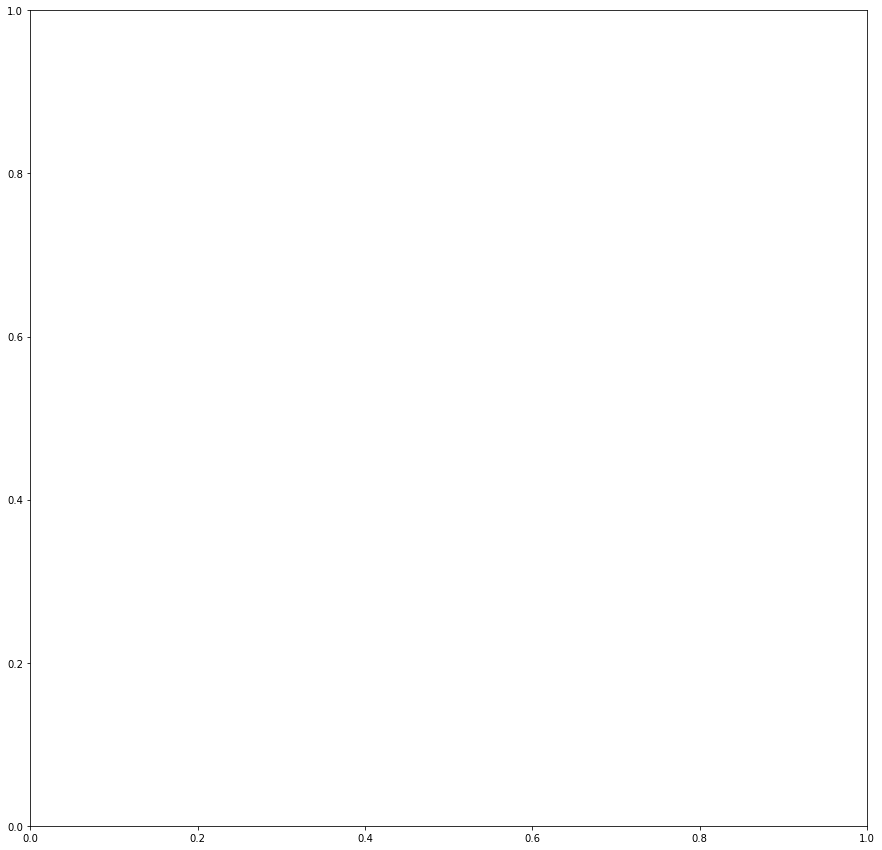

In [11]:
fig, ax = plt.subplots(figsize=(15,15)) #Größe Plot  konfigurieren


for i  in range(len(test_df['index'])):
    ax.scatter(test_df['area_1'][i],
               test_df['area_2'][i],
               color=colors[test_df['type'][i]])
    
ax.set_title('VDKI Daten')
ax.set_facecolor((0.1,0.1,0.1))
ax.set_xlabel('Erstes')
ax.set_ylabel('Zweites')

Klassen statt mit Namen mit Zahlen bezeichnen

In [ ]:
test_original_df = test_df #alten dataframe sichern

In [ ]:
type_to_int ={'Dosenoeffner':0,'Flaschenoeffner':1, 'Korkenzieher':2} # Für jede Klasse eindeutige Zahl setzen

test_df['type']=test_df['type'].map(type_to_int) # Klassenspalte überschreiben mit Zahlen
test_df.head()

Daten Visualieren, Merkmale und Kategorien

In [ ]:
test_df.hist(figsize=(10,10)) #berechnet Histogramme aller Spalten
plt.show()

Scattermatrix erstellen als schnellen Überblick

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(test_df,figsize=(15,15))
plt.show()

Erzeuge Trainings- und Testdaten
1. Erzeuge eine Dataframe mit allen Merkmalen, aber nicht der Kategorie (Letzte Spalte)
2. Erzeuge eine Dataframe nur mit der Kategorie (letzte Spalte)

In [ ]:
X = test_df.iloc[:,:-1] #alles außer letzter Spalte
y = test_df.iloc[:,-1] #nur letzte Spalte
print('X: ',X.shape, ' y: ',y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

print('X_train: ', X_train.shape, ' y_train: ',y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)

Bayes Klassifikator

In [ ]:
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
bayes_clf = GaussianNB()
bayes_clf.fit(X_train,y_train) #Wende Klassifikator auf Trainingsdaten an

print('Accuracy Bayes: ', bayes_clf.score(X_test, y_test))

Accuracy = 1: Kann komplett genau klassifizieren

Weitere Maße außer Accuracy:

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = bayes_clf.predict(X_test) #nimm Testdaten als Vorhersagedaten

print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Entscheidungsbaum

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

In [ ]:
print('Accuracy Decision Tree', tree_clf.score(X_test,y_test)) # Accuracy nach Generalisierung

In [ ]:
tree.plot_tree(tree_clf)

Decision Tree anwenden

In [ ]:
y_pred = tree_clf.predict(X_test) #Vorhesage der X_testdaten erzeugen
# hier könnten statt X_test auch andere Dataframes stehen

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test,y_pred)) #Vergleich Prädiktion mit Test

In [ ]:
X_testDf = pd.DataFrame([[5.1,2.9,1.6,0.3]],columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y_pred = tree_clf.predict(X_testDf)

In [ ]:
print('Vorhergesagte Kategorie: ',y_pred)

In [ ]:
y_pred_bayes = bayes_clf.predict(X_testDf)
print('Vorhergesagte Kategorie mit Bayes: ',y_pred_bayes)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=2)

forest_clf.fit(X_train,y_train)

In [ ]:
y_pred_rf = forest_clf.predict(X_test)
print('Accuracy Random Forest: ', accuracy_score(y_test,y_pred_rf))